# k means教程

### 0. 引入依赖

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 从sklearn中直接生成聚类数据
from sklearn.datasets.samples_generator import make_blobs

### 1. 数据加载

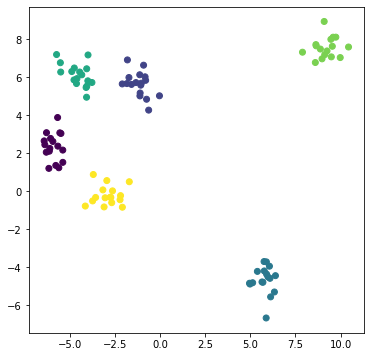

In [6]:
x, y = make_blobs( n_samples=100, centers=6, random_state=1234, cluster_std=0.6 )

plt.figure(figsize=(6,6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

### 2. 算法实现

In [7]:
# 引入scipy中的距离函数，默认欧式距离
from scipy.spatial.distance import cdist

class K_Means(object):
    # 初始化，参数 n_clusters（K）、迭代次数max_iter、初始质心 centroids
    def __init__(self, n_clusters=5, max_iter=300, centroids=[]):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = np.array( centroids, dtype=np.float )
        
    # 训练模型方法，k-means聚类过程，传入原始数据
    def fit(self, data):
        # 假如没有指定初始质心，就随机选取data中的点作为初始质心
        if( self.centroids.shape == (0,) ):
            # 从data中随机生成0到data行数的6个整数，作为索引值
            self.centroids = data[ np.random.randint( 0, data.shape[0], self.n_clusters ) ,: ]
            
        # 开始迭代
        for i in range(self.max_iter):
            # 1. 计算距离矩阵，得到的是一个100*6的矩阵
            distances = cdist(data, self.centroids)
            
            # 2. 对距离按有近到远排序，选取最近的质心点的类别，作为当前点的分类
            c_ind = np.argmin( distances, axis=1 )
            
            # 3. 对每一类数据进行均值计算，更新质心点坐标
            for i in range(self.n_clusters):
                # 排除掉没有出现在c_ind里的类别
                if i in c_ind:
                    # 选出所有类别是i的点，取data里面坐标的均值，更新第i个质心
                    self.centroids[i] = np.mean( data[c_ind==i], axis=0 )
    
    # 实现预测方法
    def predict(self, samples):
        # 跟上面一样，先计算距离矩阵，然后选取距离最近的那个质心的类别
        distances = cdist(samples, self.centroids)
        c_ind = np.argmin( distances, axis=1 )
        
        return c_ind

dist = np.array([[121,221,32,43],
                [121,1,12,23],
                [65,21,2,43],
                [1,221,32,43],
                [21,11,22,3],])
c_ind = np.argmin( dist, axis=1 )
print(c_ind)
x_new=x[0:5]
print(x_new)
print(c_ind==2)
print(x_new[c_ind==2])
np.mean(x_new[c_ind==2], axis=0)

[2 1 2 0 3]
[[-0.02708305  5.0215929 ]
 [-5.49252256  6.27366991]
 [-5.37691608  1.51403209]
 [-5.37872006  2.16059225]
 [ 9.58333171  8.10916554]]
[ True False  True False False]
[[-0.02708305  5.0215929 ]
 [-5.37691608  1.51403209]]


array([-2.70199956,  3.26781249])

### 3. 测试

[[ 5.76444812 -4.67941789]
 [-2.89174024 -0.22808556]
 [-5.89115978  2.33887408]
 [-2.8455246   5.87376915]
 [ 9.20551979  7.56124841]]
[1 4]


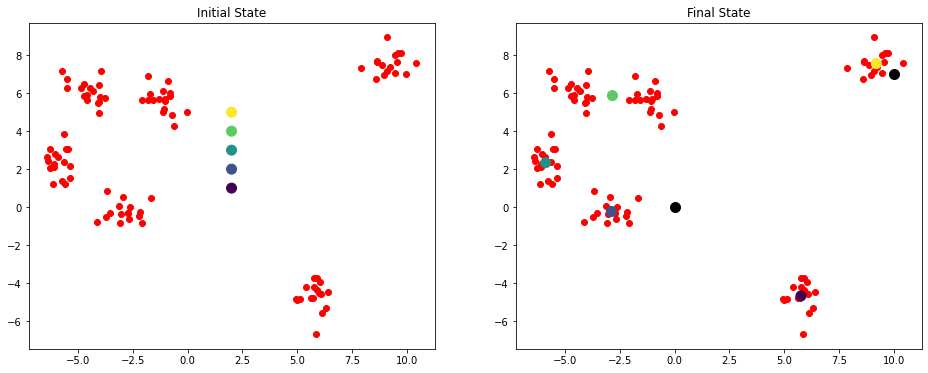

In [8]:
# 定义一个绘制子图函数
def plotKMeans(x, y, centroids, subplot, title):
    # 分配子图，121表示1行2列的子图中的第一个
    plt.subplot(subplot)
    plt.scatter(x[:,0], x[:,1], c='r')
    # 画出质心点
    plt.scatter(centroids[:,0], centroids[:,1], c=np.array(range(5)), s=100)
    plt.title(title)

kmeans = K_Means(max_iter=300, centroids=np.array([[2,1],[2,2],[2,3],[2,4],[2,5]]))

plt.figure(figsize=(16, 6))
plotKMeans( x, y, kmeans.centroids, 121, 'Initial State' )

# 开始聚类
kmeans.fit(x)

plotKMeans( x, y, kmeans.centroids, 122, 'Final State' )

# 预测新数据点的类别
x_new = np.array([[0,0],[10,7]])
y_pred = kmeans.predict(x_new)

print(kmeans.centroids)
print(y_pred)

plt.scatter(x_new[:,0], x_new[:,1], s=100, c='black')